In [1]:
import sys
sys.path.append('../')

from src import *

2025-02-10 17:51:47.368209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739220707.395654   37748 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739220707.407011   37748 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 17:51:47.438110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Strategy

First I will import the data and preprocessed it, to reshape in the size of an image.
Next I will create the following models:
- Dropout=False | Topology=[64, 32, 16]
- Dropout=True | Topology=[64, 32, 16]
- Dropout=False | Topology=[512, 256, 128]
- Dropout=True | Topology=[512, 256, 128]
- Dropout=True or false depending on how well the last models did | Topology=[512, 156, 128, 64, 32, 16]

Each model will be trained for 15 epochs.

At the end a MLP model will be trained with the same topology as the best model. The preprocessing of the MLP data will only consist of a normalization by dividing the values by 255, so it becomes a value between 0 and 1.


In [2]:
# As the dataset had labels converted to numbers, it was necessary to search in the documentation to know which number corresponded to each label
# The labels are:
# 0 -> T-shirt/top
# 1 -> Trouser
# 2 -> Pullover
# 3 -> Dress
# 4 -> Coat
# 5 -> Sandal
# 6 -> Shirt
# 7 -> Sneaker
# 8 -> Bag
# 9 -> Ankle boot

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [47]:
models_losses = []
models_accuracies = []
input_shape = (28, 28, 1)
mlp_input_shape = (784,)
n_classes = 10

In [4]:
df_train = load_data('../data/fashion-mnist_train.csv')
df_test = load_data('../data/fashion-mnist_test.csv')

Data loaded successfully.
Data loaded successfully.


In [5]:
X_train_cnn, y_train_cnn = data_preprocess(df_train)
X_test_cnn, y_test_cnn = data_preprocess(df_test)

Data reshaped successfully.
Data normalized successfully.
Data preprocessed successfully.
Data reshaped successfully.
Data normalized successfully.
Data preprocessed successfully.


In [45]:
X_train_mlp, y_train_mlp = data_preprocess(df_train, cnn=False)
X_test_mlp, y_test_mlp = data_preprocess(df_test, cnn=False)

Data normalized successfully.
Data preprocessed successfully.
Data normalized successfully.
Data preprocessed successfully.


### Dropout=False | Topology=[64, 32, 16]

In [6]:
cnn = build_cnn(input_shape, n_classes, topology=[64, 32, 16], dropout=False)

/home/eric/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1739220716.662302   37748 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4699 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model created successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │       173,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,882 (679.23 KB)

 Trainable params: 173,882 (679.23 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=15, validation_split=0.2)

Epoch 1/15


I0000 00:00:1739220719.176455   37820 service.cc:148] XLA service 0x7f82c40b7f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739220719.176635   37820 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-02-10 17:51:59.215451: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739220719.425780   37820 cuda_dnn.cc:529] Loaded cuDNN version 90300


  33/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3141 - loss: 1.9066

I0000 00:00:1739220720.611279   37820 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7679 - loss: 0.6643 - val_accuracy: 0.8802 - val_loss: 0.3541
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8837 - loss: 0.3274 - val_accuracy: 0.8905 - val_loss: 0.3162
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8985 - loss: 0.2829 - val_accuracy: 0.8968 - val_loss: 0.3030
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9096 - loss: 0.2548 - val_accuracy: 0.8950 - val_loss: 0.3015
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9152 - loss: 0.2367 - val_accuracy: 0.8944 - val_loss: 0.2983
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9231 - loss: 0.2139 - val_accuracy: 0.9057 - val_loss: 0.2736
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9307 - loss: 0.1937 - val_accuracy: 0.9013 - val_loss: 0.2894
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9344 - loss: 0.1792 - val_ac

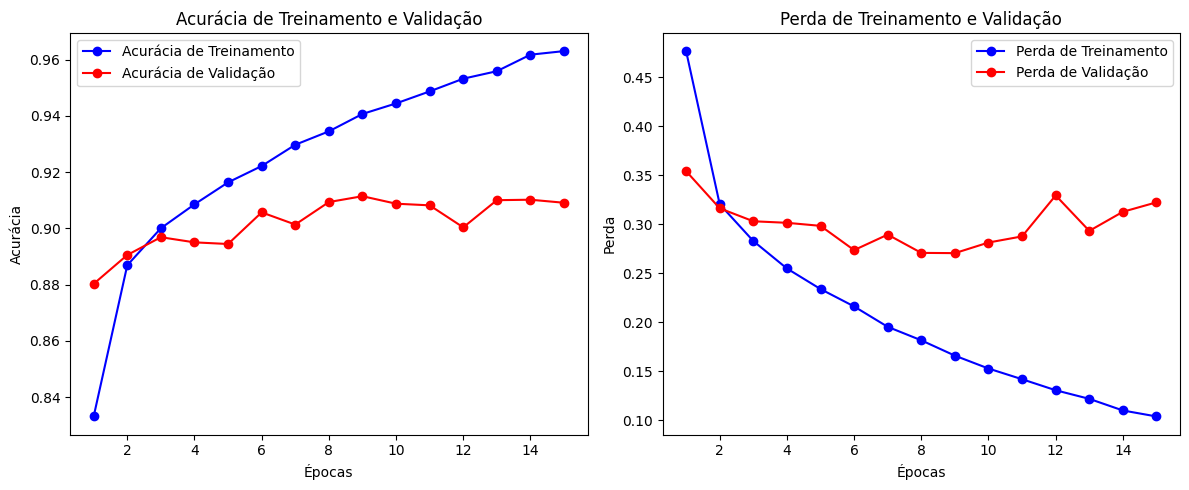

In [8]:
plot_training_history(history)

In [9]:
loss, accuracy = evaluate_model(cnn, X_test_cnn, y_test_cnn)

models_losses.append(loss)
models_accuracies.append(accuracy)

Test loss: 0.3163
Test accuracy: 0.9094


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


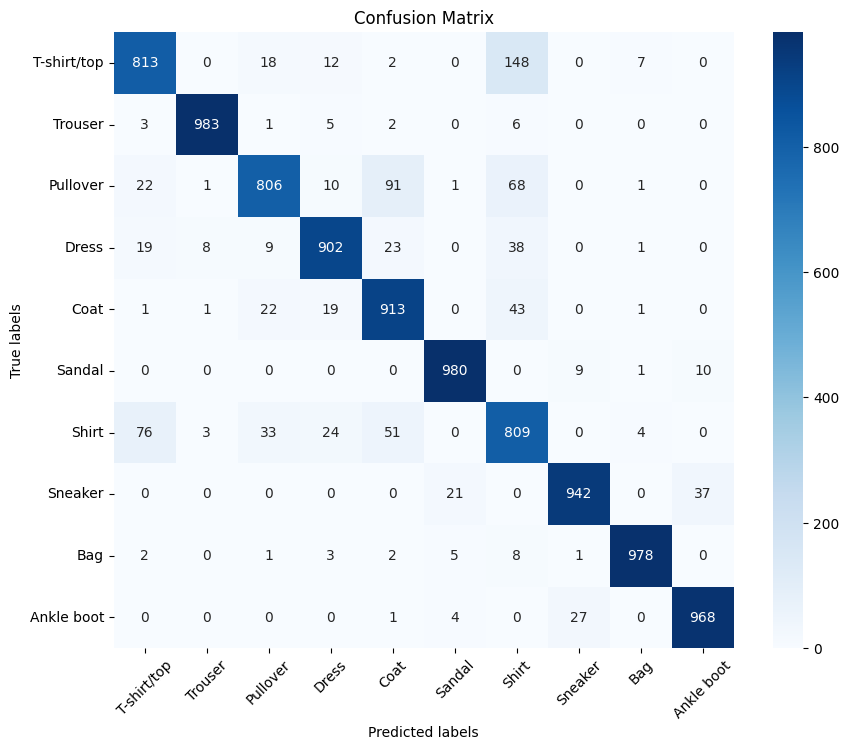

In [10]:
y_pred = cnn.predict(X_test_cnn)
plot_confusion_matrix(y_test_cnn, y_pred.argmax(axis=1), class_labels)

### Dropout=True | Topology=[64, 32, 16]

In [12]:
cnn = build_cnn(input_shape, n_classes, topology=[64, 32, 16], dropout=True)

Model created successfully!


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │       173,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,882 (679.23 KB)

 Trainable params: 173,882 (679.23 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4681 - loss: 1.4057 - val_accuracy: 0.8037 - val_loss: 0.5464
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6305 - loss: 0.9467 - val_accuracy: 0.8295 - val_loss: 0.4822
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6708 - loss: 0.8597 - val_accuracy: 0.8538 - val_loss: 0.4402
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6872 - loss: 0.8238 - val_accuracy: 0.8584 - val_loss: 0.4245
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7048 - loss: 0.7884 - val_accuracy: 0.8686 - val_loss: 0.3940
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7011 - loss: 0.7780 - val_accuracy: 0.8758 - val_loss: 0.3923
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7071 - loss: 0.7675 - val_accuracy: 0.8776 - val_loss: 0.3827
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7110 - loss: 0.75

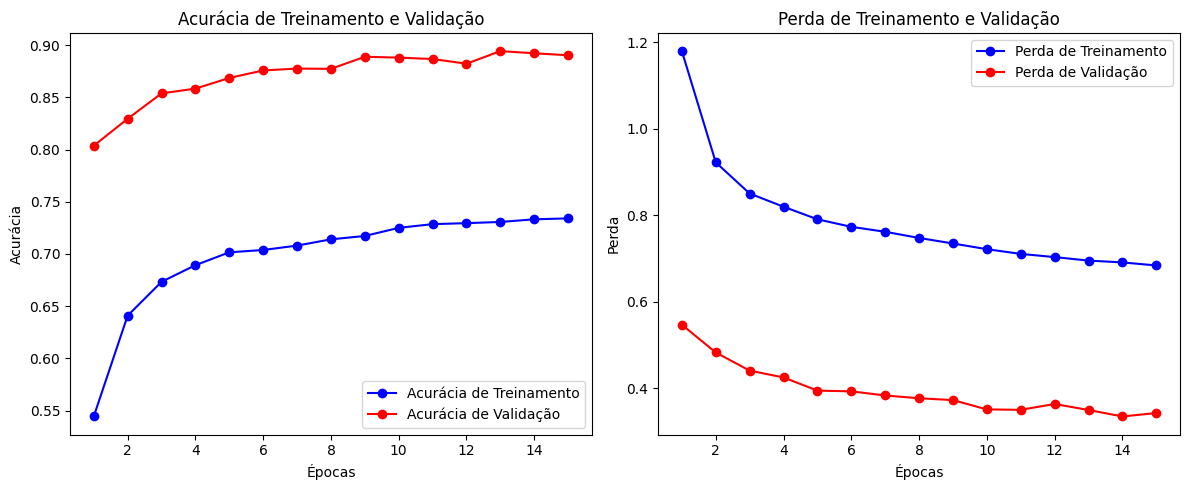

In [14]:
plot_training_history(history)

In [15]:
loss, accuracy = evaluate_model(cnn, X_test_cnn, y_test_cnn)

models_losses.append(loss)
models_accuracies.append(accuracy)

Test loss: 0.3385
Test accuracy: 0.8952


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


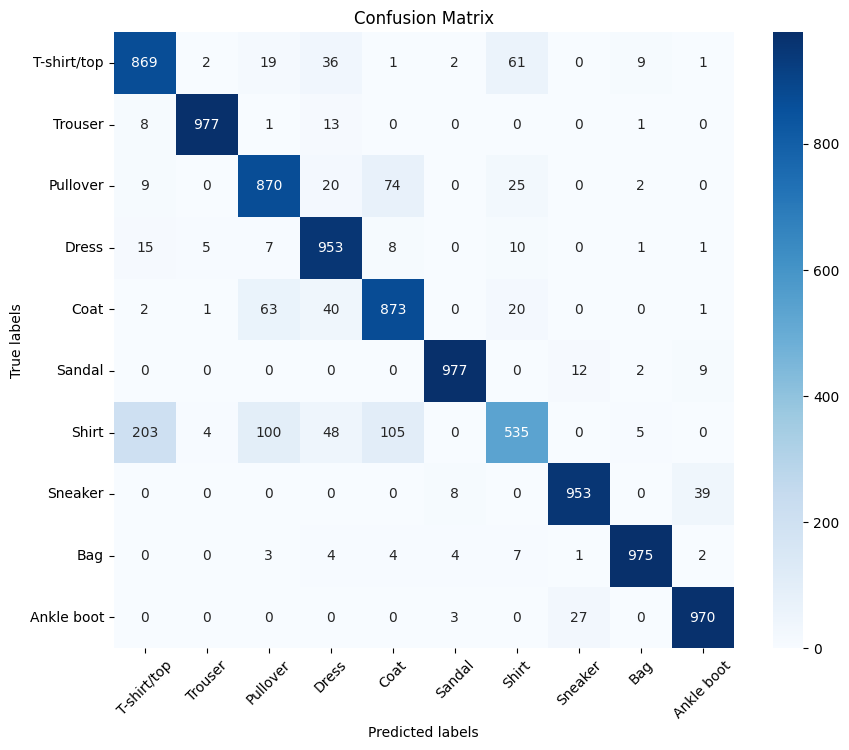

In [16]:
y_pred = cnn.predict(X_test_cnn)
plot_confusion_matrix(y_test_cnn, y_pred.argmax(axis=1), class_labels)

### Dropout=False | Topology=[512, 256, 128]

In [17]:
cnn = build_cnn(input_shape, n_classes, topology=[512, 256, 128], dropout=False)

Model created successfully!


/home/eric/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,082,122 (42.27 MB)

 Trainable params: 11,082,122 (42.27 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8253 - loss: 0.4897 - val_accuracy: 0.8921 - val_loss: 0.3027
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9081 - loss: 0.2488 - val_accuracy: 0.8999 - val_loss: 0.2793
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9296 - loss: 0.1883 - val_accuracy: 0.9137 - val_loss: 0.2479
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9453 - loss: 0.1459 - val_accuracy: 0.9143 - val_loss: 0.2613
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9574 - loss: 0.1162 - val_accuracy: 0.9101 - val_loss: 0.2859
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9689 - loss: 0.0873 - val_accuracy: 0.9119 - val_loss: 0.2886
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9762 - loss: 0.0669 - val_accuracy: 0.9053 - val_loss: 0.3576
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9804 -

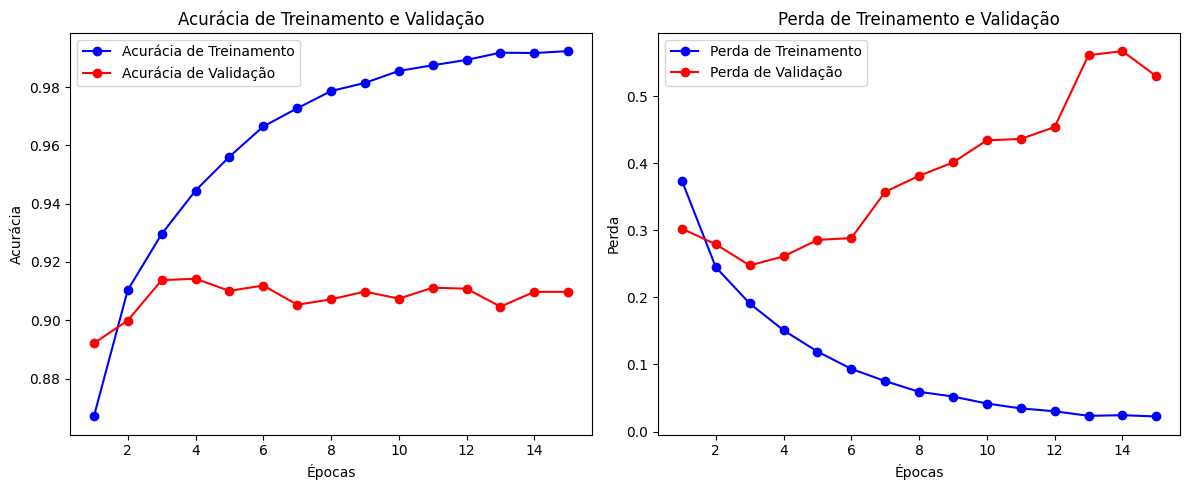

In [19]:
plot_training_history(history)

In [20]:
loss, accuracy = evaluate_model(cnn, X_test_cnn, y_test_cnn)

models_losses.append(loss)
models_accuracies.append(accuracy)

Test loss: 0.4886
Test accuracy: 0.9154


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


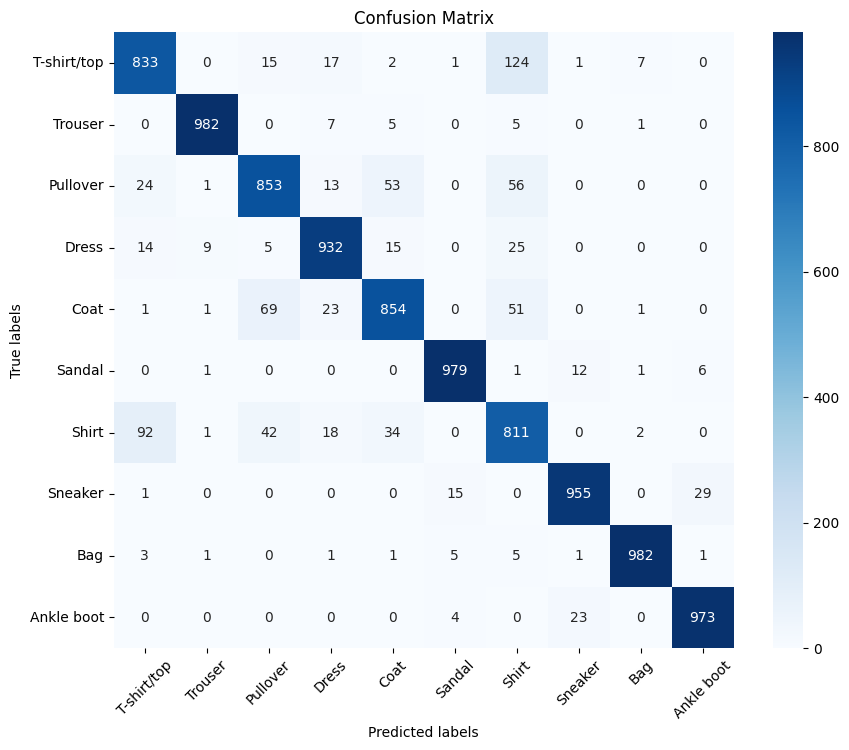

In [21]:
y_pred = cnn.predict(X_test_cnn)
plot_confusion_matrix(y_test_cnn, y_pred.argmax(axis=1), class_labels)

### Dropout=True | Topology=[512, 256, 128]

In [22]:
cnn = build_cnn(input_shape, n_classes, topology=[512, 256, 128], dropout=True)

Model created successfully!


/home/eric/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,082,122 (42.27 MB)

 Trainable params: 11,082,122 (42.27 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7738 - loss: 0.6522 - val_accuracy: 0.8794 - val_loss: 0.3293
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8731 - loss: 0.3591 - val_accuracy: 0.8957 - val_loss: 0.2852
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8882 - loss: 0.3069 - val_accuracy: 0.9014 - val_loss: 0.2726
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8973 - loss: 0.2785 - val_accuracy: 0.9022 - val_loss: 0.2761
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9047 - loss: 0.2561 - val_accuracy: 0.9093 - val_loss: 0.2519
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9123 - loss: 0.2379 - val_accuracy: 0.9062 - val_loss: 0.2557
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9205 - loss: 0.2189 - val_accuracy: 0.9112 - val_loss: 0.2604
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9198 -

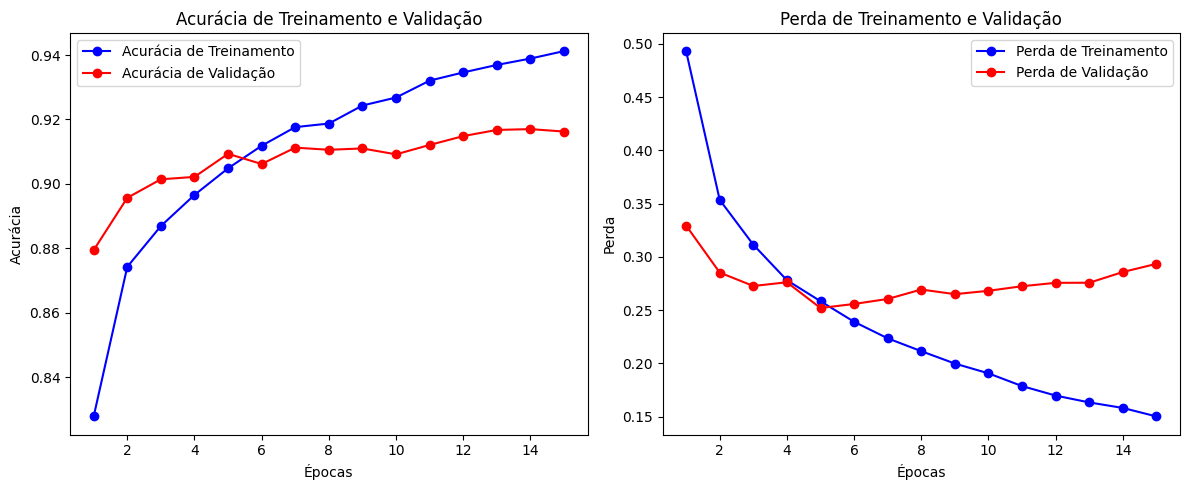

In [24]:
plot_training_history(history)

In [25]:
loss, accuracy = evaluate_model(cnn, X_test_cnn, y_test_cnn)

models_losses.append(loss)
models_accuracies.append(accuracy)

Test loss: 0.2833
Test accuracy: 0.9207


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


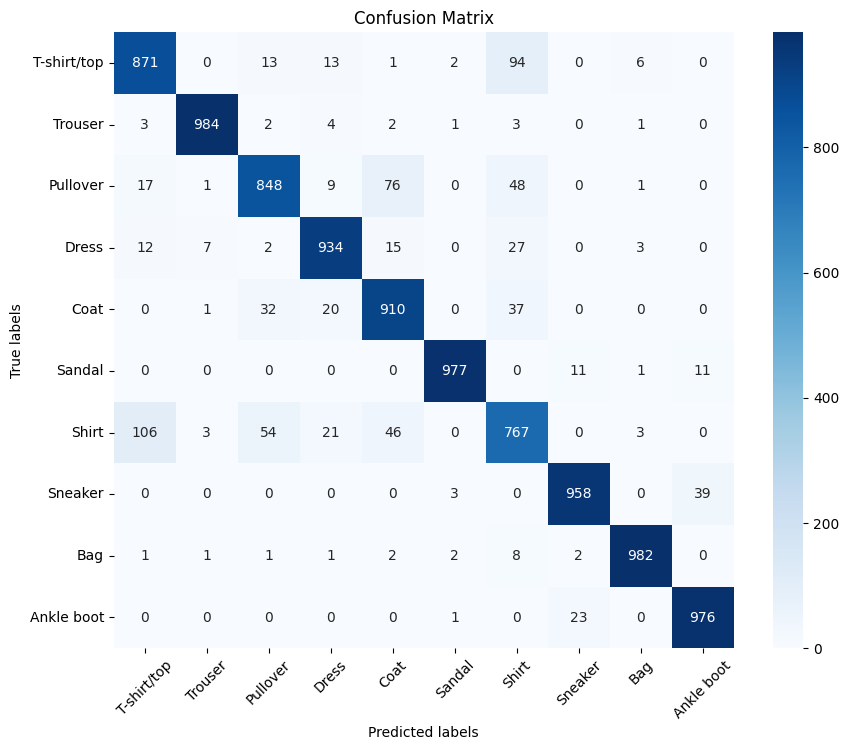

In [26]:
y_pred = cnn.predict(X_test_cnn)
plot_confusion_matrix(y_test_cnn, y_pred.argmax(axis=1), class_labels)

### Dropout=True | Topology=[512, 256, 128. 64, 32]

In [33]:
cnn = build_cnn(input_shape, n_classes, topology=[512, 256, 128, 64, 32], dropout=True)

Model created successfully!


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 13, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,484,522 (5.66 MB)

 Trainable params: 1,484,522 (5.66 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = cnn.fit(X_train_cnn, y_train_cnn, epochs=15, validation_split=0.2)

Epoch 1/15


2025-02-10 18:13:01.528244: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,256,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,512,13,13]{3,2,1,0}, f32[256,512,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-10 18:13:02.110748: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,256,5,5]{3,2,1,0}, f32[128,256,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5818 - loss: 1.1365

2025-02-10 18:13:36.160517: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,256,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,512,13,13]{3,2,1,0}, f32[256,512,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-10 18:13:36.506282: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,256,5,5]{3,2,1,0}, f32[128,256,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.5820 - loss: 1.1359 - val_accuracy: 0.8292 - val_loss: 0.4722
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7832 - loss: 0.6059 - val_accuracy: 0.8378 - val_loss: 0.4288
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8138 - loss: 0.5308 - val_accuracy: 0.8480 - val_loss: 0.3911
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8273 - loss: 0.4913 - val_accuracy: 0.8673 - val_loss: 0.3664
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8355 - loss: 0.4612 - val_accuracy: 0.8717 - val_loss: 0.3575
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8436 - loss: 0.4355 - val_accuracy: 0.8710 - val_loss: 0.3449
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8478 - loss: 0.4182 - val_accuracy: 0.8812 - val_loss: 0.3289
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8549 - loss: 0.40

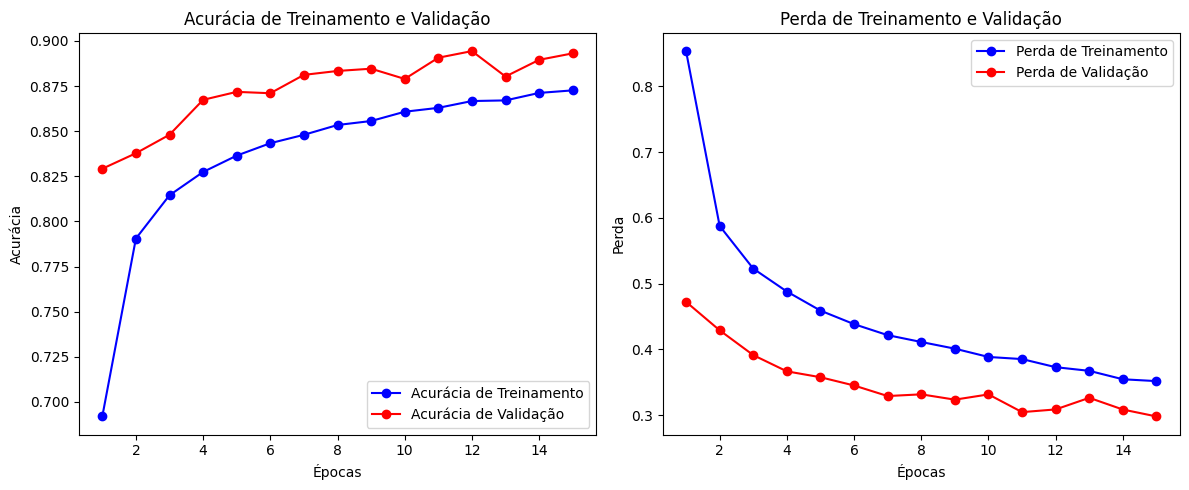

In [35]:
plot_training_history(history)

In [36]:
loss, accuracy = evaluate_model(cnn, X_test_cnn, y_test_cnn)

models_losses.append(loss)
models_accuracies.append(accuracy)

2025-02-10 18:21:44.133101: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,256,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,512,13,13]{3,2,1,0}, f32[256,512,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-10 18:21:44.372361: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,256,5,5]{3,2,1,0}, f32[128,256,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"

Test loss: 0.2800
Test accuracy: 0.8985


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


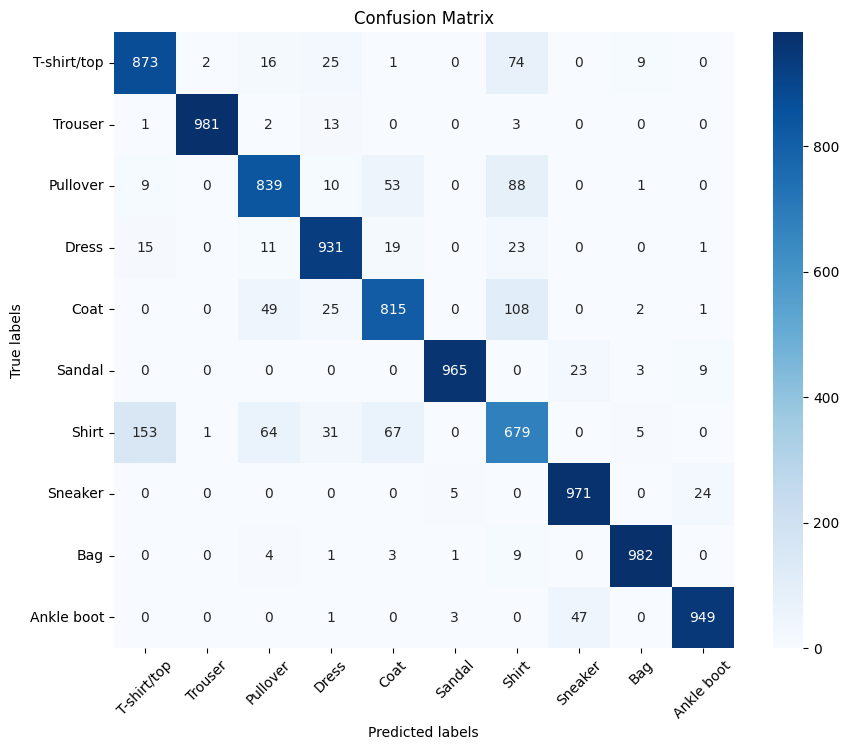

In [37]:
y_pred = cnn.predict(X_test_cnn)
plot_confusion_matrix(y_test_cnn, y_pred.argmax(axis=1), class_labels)

## Analysis of best two models

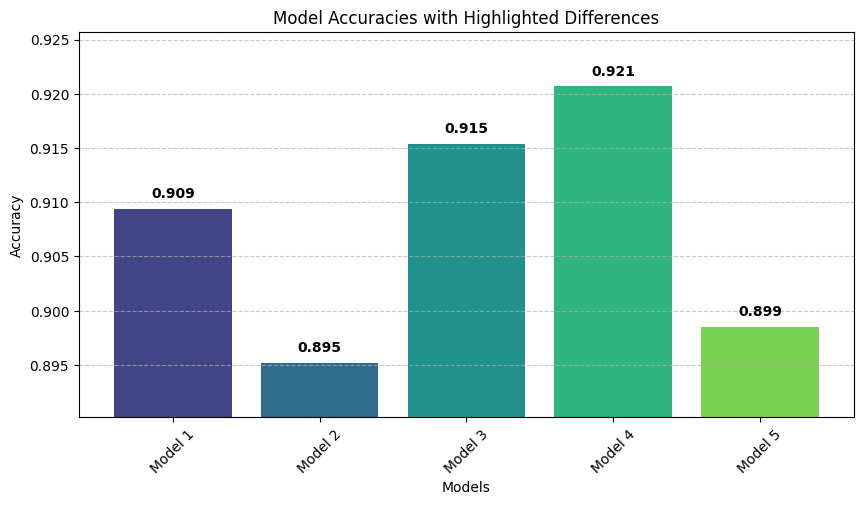

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Generate model names
num_models = len(models_accuracies)  # Assuming accuracies and losses have the same length
model_names = [f"Model {i+1}" for i in range(num_models)]

# Plot accuracies
plt.figure(figsize=(10, 5))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, num_models))  # Color gradient
bars = plt.bar(model_names, models_accuracies, color=colors)

# Dynamic Y-axis range
plt.ylim(min(models_accuracies) - 0.005, max(models_accuracies) + 0.005)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies with Highlighted Differences")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f"{yval:.3f}", 
             ha='center', fontsize=10, fontweight='bold')

plt.show()

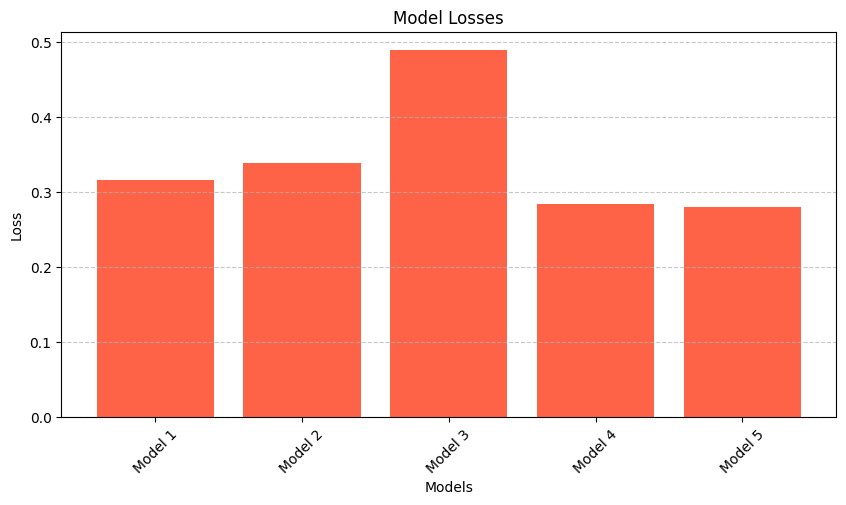

In [42]:
# Plot losses
plt.figure(figsize=(10, 5))
plt.bar(model_names, models_losses, color='tomato')
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Model Losses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

When comparing the plots we can see that the Models 3 and 4, both with the topology [512, 256, 128], learned better, and Model 4 resulted in a more accurate classification, highlighting the effects of dropout layers. We can conclude that model 3 slightly overfitted the train dataset, and that dropout layers are an effective way to avoid overfitting.

The losses plot show that the model that learned the image patterns faster was Model 5, slightly tied with Model 4. Model 3 loss is higher than expected, possibly indicating that it could learn more if more epochs were ran.

# MLP model with same topology as Model 4

In [48]:
mlp = build_mlp(mlp_input_shape, n_classes, topology=[512, 256, 128], dropout=True)

Model created successfully!


/home/eric/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = mlp.fit(X_train_mlp, y_train_mlp, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6875 - loss: 0.8627 - val_accuracy: 0.8493 - val_loss: 0.4289
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8306 - loss: 0.4753 - val_accuracy: 0.8587 - val_loss: 0.4083
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8472 - loss: 0.4251 - val_accuracy: 0.8706 - val_loss: 0.3778
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8535 - loss: 0.4147 - val_accuracy: 0.8685 - val_loss: 0.3617
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8608 - loss: 0.3957 - val_accuracy: 0.8758 - val_loss: 0.3489
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8642 - loss: 0.3817 - val_accuracy: 0.8683 - val_loss: 0.3502
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8660 - loss: 0.3718 - val_accuracy: 0.8784 - val_loss: 0.3404
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8718 - loss: 0.35

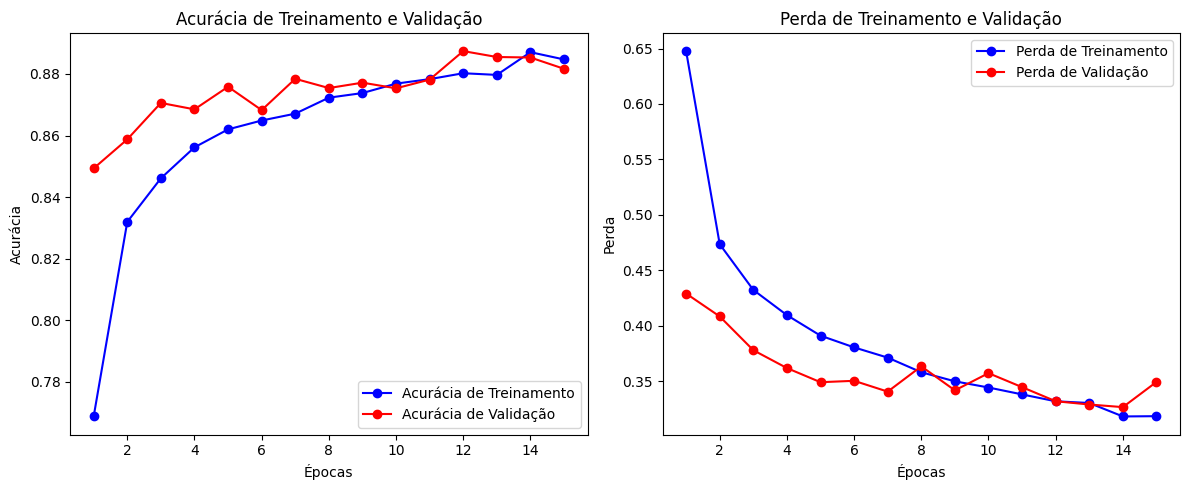

In [50]:
plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


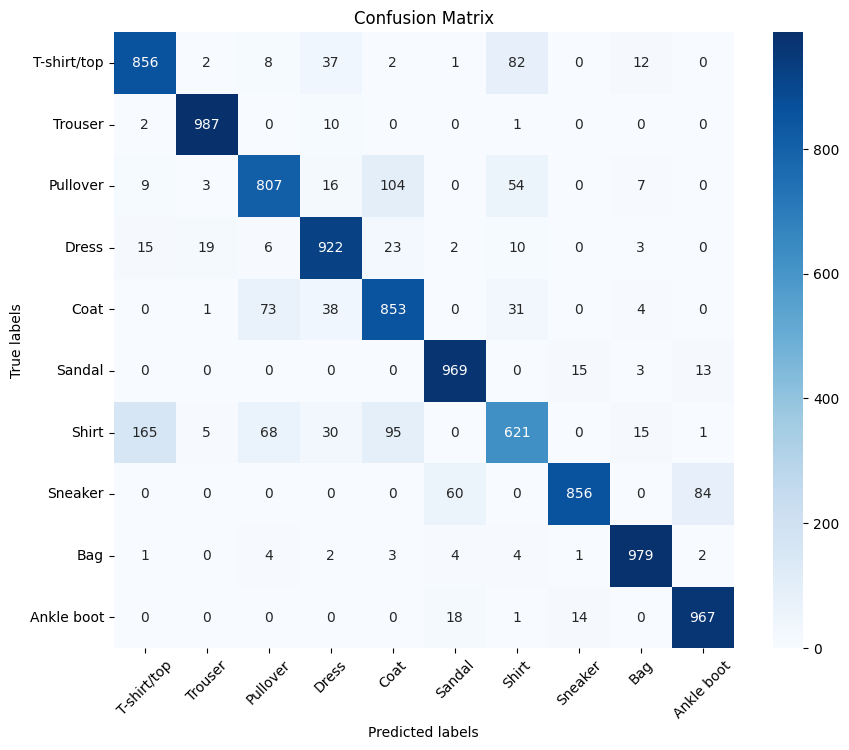

In [51]:
y_pred = mlp.predict(X_test_mlp)
plot_confusion_matrix(y_test_mlp, y_pred.argmax(axis=1), class_labels)

In [52]:
loss, accuracy = evaluate_model(mlp, X_test_mlp, y_test_mlp)

Test loss: 0.3433
Test accuracy: 0.8817


When comparing both, the CNN model with the same topology learned the patterns better.